# Evaluating Tikhonet Trained

In this Notebook we are going to evaluate the performance of a [Tikhonet](https://arxiv.org/pdf/1911.00443.pdf) trained.

## Required Libraries and Functions

In [1]:
%matplotlib inline
import sys

# Add library path to PYTHONPATH
data_path = './'

# Libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pickle

# Function
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

## Load Images

In [2]:
g = open(data_path+"meerkat3600_examples.pkl", "rb")
batch = pickle.load(g)
g.close()

In [3]:
batch.keys()

dict_keys(['flagged', 'unflagged'])

In [4]:
batch['unflagged'].keys()

dict_keys(['inputs', 'inputs_tikho', 'targets', 'psf', 'snr', 'clean', 'clean_iso', 'skymodel', 'sparsity', 'score', 'tikhonet', 'tikhonet_sc'])

## Plot Successful Galaxy Images

<ipython-input-5-1d25c600e292>:48: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  cb = cax.colorbar(imx,format=fmt)
/opt/anaconda3/envs/shear/lib/python3.8/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


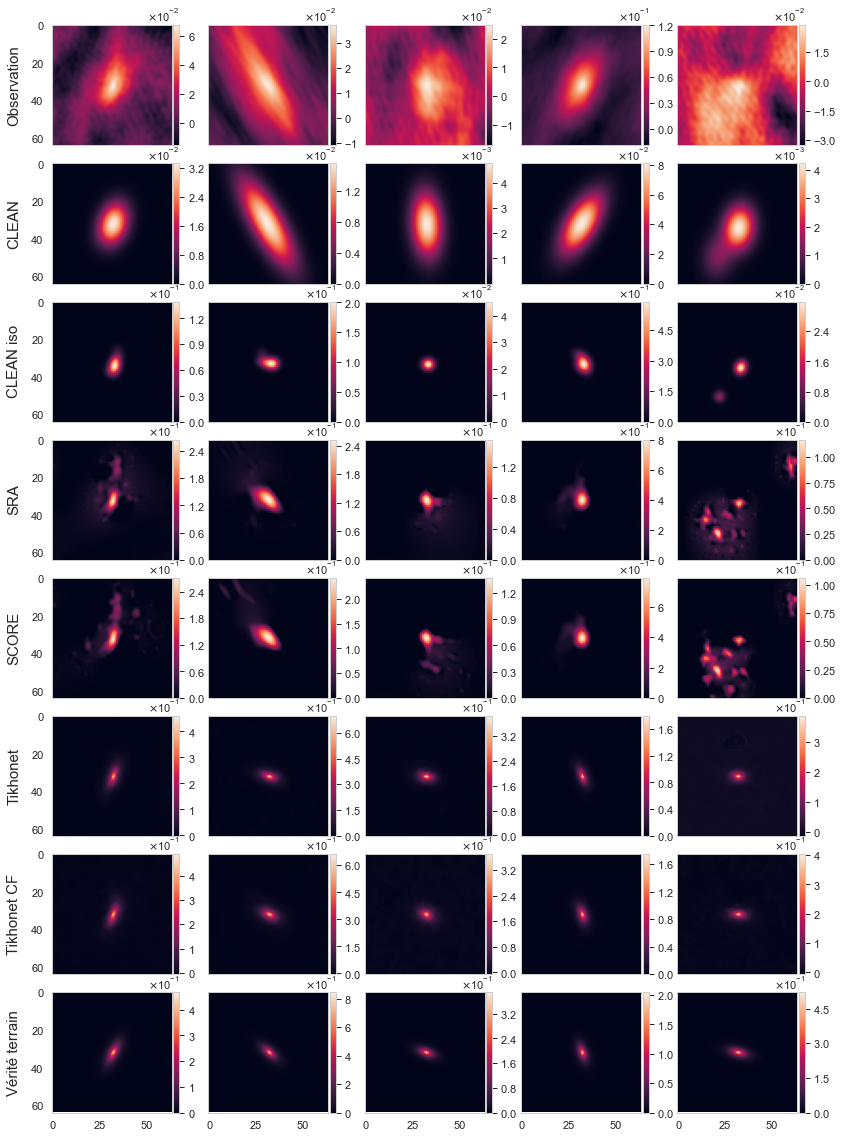

In [5]:
batch['unflagged']['inputs'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['inputs']])
batch['unflagged']['inputs_tikho'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['inputs_tikho']])
batch['unflagged']['targets'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['targets']])
batch['unflagged']['tikhonet'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['tikhonet']])
batch['unflagged']['tikhonet_sc'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['tikhonet_sc']])
batch['unflagged']['clean'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['clean']])
batch['unflagged']['clean_iso'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['clean_iso']])
batch['unflagged']['sparsity'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['sparsity']])
batch['unflagged']['score'] = np.array([crop_center(im,64,64) for im in batch['unflagged']['score']])

# set seaborn theme and style
sns.set_theme()
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2.5})
#remove grid from images
sns.set_style("whitegrid", {'axes.grid' : False})

list_im = []
keys = ['inputs', 'clean', 'clean_iso', 'sparsity', 'score', 'tikhonet', 'tikhonet_sc', 'targets']

for key in keys:
    for i in range(5):
        list_im += [batch['unflagged'][key][i]]

list_min = []
list_max = []

for im in batch['unflagged']['inputs']:
    list_min += [np.min(im)]
    list_max += [np.max(im)]
    
list_min = np.tile(np.array(list_min),8)
list_max = np.tile(np.array(list_max),8)

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 5),  # creates 2x2 grid of axes
                 axes_pad=[0.4,0.25],  # pad between axes in inch.
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_pad=0.02
                 )
i=0
for ax, cax, im in zip(grid, grid.cbar_axes, list_im):
    # Iterating over the grid returns the Axes.
    imx = ax.imshow(im)#,vmin=list_min[i],vmax=list_max[i])
    fmt = matplotlib.ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cb = cax.colorbar(imx,format=fmt)
    i+=1
    
labels = ['Observation', 'CLEAN', 'CLEAN iso', 'SRA', 'SCORE', 'Tikhonet', 'ShapeNet', 'Vérité terrain']
for ind, label in enumerate(labels):
    grid[5*ind].set_ylabel(label, fontsize=15, rotation=90,labelpad=10)

plt.savefig('meerkat3600_images_unflagged.pdf', bbox_inches='tight')

## Plot Failed Galaxy Images

<ipython-input-6-5a7daef99279>:48: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  cb = cax.colorbar(imx,format=fmt)
<ipython-input-6-5a7daef99279>:48: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  cb = cax.colorbar(imx,format=fmt)


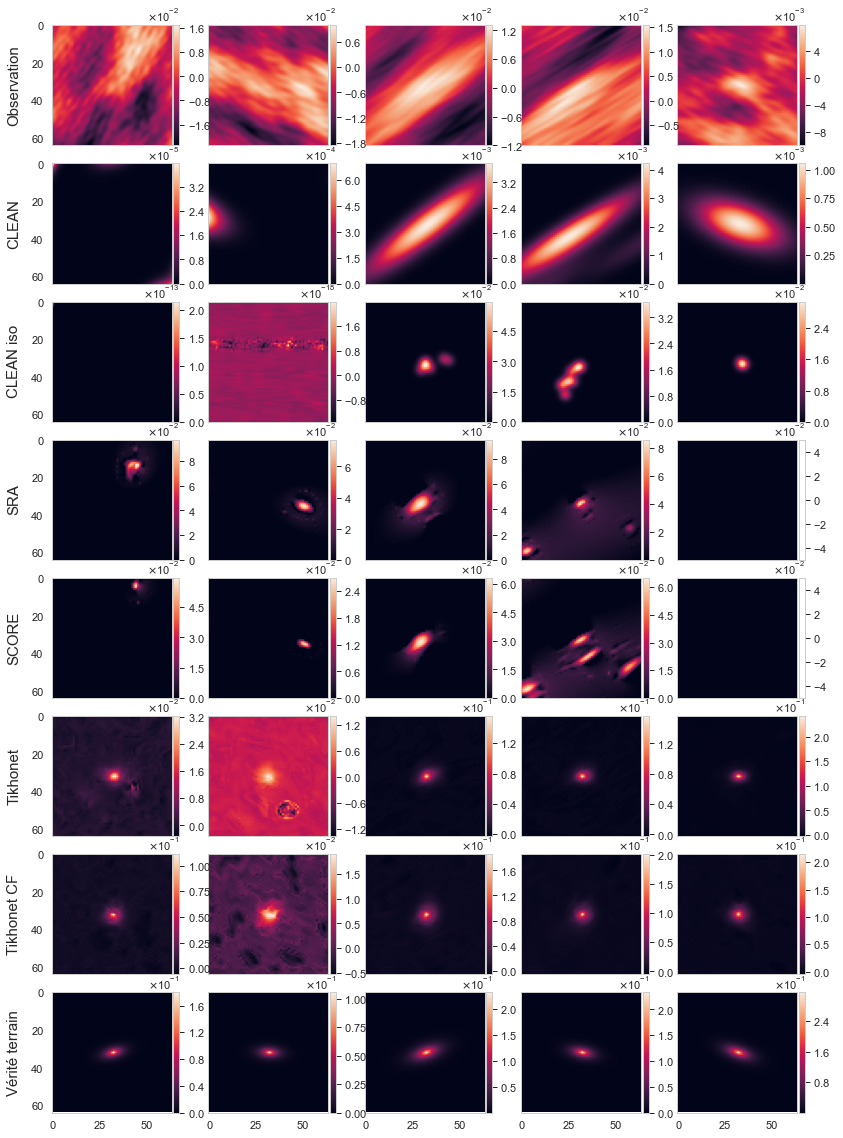

In [6]:
batch['flagged']['inputs'] = np.array([crop_center(im,64,64) for im in batch['flagged']['inputs']])
batch['flagged']['inputs_tikho'] = np.array([crop_center(im,64,64) for im in batch['flagged']['inputs_tikho']])
batch['flagged']['targets'] = np.array([crop_center(im,64,64) for im in batch['flagged']['targets']])
batch['flagged']['tikhonet'] = np.array([crop_center(im,64,64) for im in batch['flagged']['tikhonet']])
batch['flagged']['tikhonet_sc'] = np.array([crop_center(im,64,64) for im in batch['flagged']['tikhonet_sc']])
batch['flagged']['clean'] = np.array([crop_center(im,64,64) for im in batch['flagged']['clean']])
batch['flagged']['clean_iso'] = np.array([crop_center(im,64,64) for im in batch['flagged']['clean_iso']])
batch['flagged']['sparsity'] = np.array([crop_center(im,64,64) for im in batch['flagged']['sparsity']])
batch['flagged']['score'] = np.array([crop_center(im,64,64) for im in batch['flagged']['score']])

# set seaborn theme and style
sns.set_theme()
sns.set_context("paper", font_scale=1.25, rc={"lines.linewidth": 2.5})
#remove grid from images
sns.set_style("whitegrid", {'axes.grid' : False})

list_im = []
keys = ['inputs', 'clean', 'clean_iso', 'sparsity', 'score', 'tikhonet', 'tikhonet_sc', 'targets']

for key in keys:
    for i in range(5):
        list_im += [batch['flagged'][key][i]]

list_min = []
list_max = []

for im in batch['flagged']['inputs']:
    list_min += [np.min(im)]
    list_max += [np.max(im)]
    
list_min = np.tile(np.array(list_min),8)
list_max = np.tile(np.array(list_max),8)

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 5),  # creates 2x2 grid of axes
                 axes_pad=[0.4,0.25],  # pad between axes in inch.
                 cbar_location="right",
                 cbar_mode="each",
                 cbar_pad=0.02
                 )
i=0
for ax, cax, im in zip(grid, grid.cbar_axes, list_im):
    # Iterating over the grid returns the Axes.
    imx = ax.imshow(im)#,vmin=list_min[i],vmax=list_max[i])
    fmt = matplotlib.ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))
    cb = cax.colorbar(imx,format=fmt)
    i+=1
    
labels = ['Observation', 'CLEAN', 'CLEAN iso', 'SRA', 'SCORE', 'Tikhonet', 'Tikhonet CF', 'Vérité terrain']
for ind, label in enumerate(labels):
    grid[5*ind].set_ylabel(label, fontsize=15, rotation=90,labelpad=10)

plt.savefig('meerkat3600_images_flagged.pdf', bbox_inches='tight')